<a href="https://colab.research.google.com/github/gaspiman/tensorflow_certification/blob/master/horse_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-07-26 19:33:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  35.5MB/s    in 4.0s    

2020-07-26 19:33:13 (35.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

data_dir = '/tmp/horse-or-human'

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(data_dir)
zip_ref.close()

In [3]:
train_horse_dir = os.path.join(data_dir, 'horses')
train_human_dir = os.path.join(data_dir, 'humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

In [5]:
len(os.listdir(train_human_dir))

527

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

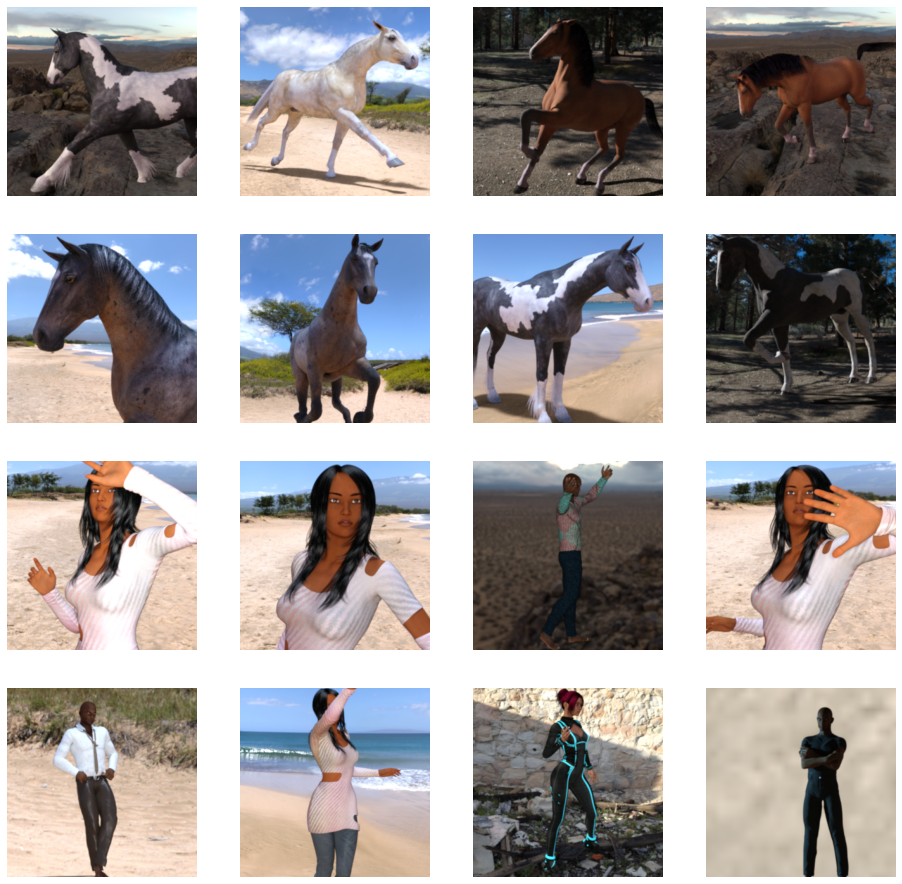

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation=keras.activations.relu, input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    ####
    keras.layers.Conv2D(32, (3,3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    ####
    keras.layers.Conv2D(64, (3,3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    ####
    keras.layers.Conv2D(64, (3,3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    #####
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
model.compile(
    optimizer=keras.optimizers.RMSprop(), 
    loss=keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 7s 878ms/step - loss: 0.3364 - accuracy: 0.8799
Epoch 2/15
8/8 [==============================] - 6s 719ms/step - loss: 0.2105 - accuracy: 0.9466
Epoch 3/15
8/8 [==============================] - 6s 750ms/step - loss: 0.1826 - accuracy: 0.9333
Epoch 4/15
8/8 [==============================] - 6s 763ms/step - loss: 0.0397 - accuracy: 0.9867
Epoch 5/15
8/8 [==============================] - 7s 875ms/step - loss: 0.0115 - accuracy: 0.9967
Epoch 6/15
8/8 [==============================] - 6s 757ms/step - loss: 0.4202 - accuracy: 0.8721
Epoch 7/15
8/8 [==============================] - 7s 878ms/step - loss: 0.0357 - accuracy: 0.9922
Epoch 8/15
8/8 [==============================] - 6s 758ms/step - loss: 0.0070 - accuracy: 0.9989
Epoch 9/15
8/8 [==============================] - 6s 723ms/step - loss: 0.1879 - accuracy: 0.9277
Epoch 10/15
8/8 [==============================] - 7s 871ms/step - loss: 0.0113 - accuracy: 0.9956
Epoch 11/15
8/8 [==

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Using TensorFlow backend.


Saving 5cb8b133b8342c1b45130629.jpeg to 5cb8b133b8342c1b45130629.jpeg
Saving 6-0-Our-People_1024x512_2.jpg to 6-0-Our-People_1024x512_2.jpg
Saving 775ce164e49c8c454937d002306a18a4f8663dd4-450x350.jpg to 775ce164e49c8c454937d002306a18a4f8663dd4-450x350.jpg
Saving hearing-0303-8.jpg to hearing-0303-8.jpg
Saving images.jpeg to images.jpeg
Saving Names_10.jpeg to Names_10.jpeg
[1.]
5cb8b133b8342c1b45130629.jpeg is a human
[1.]
6-0-Our-People_1024x512_2.jpg is a human
[1.]
775ce164e49c8c454937d002306a18a4f8663dd4-450x350.jpg is a human
[0.]
hearing-0303-8.jpg is a horse
[0.]
images.jpeg is a horse
[1.]
Names_10.jpeg is a human


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


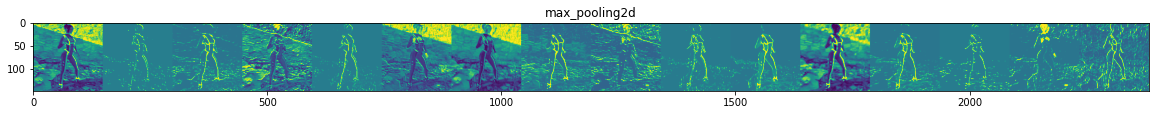

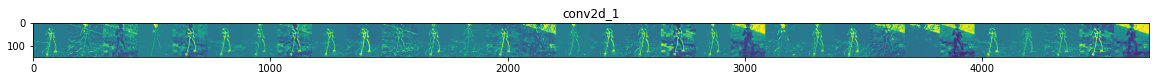

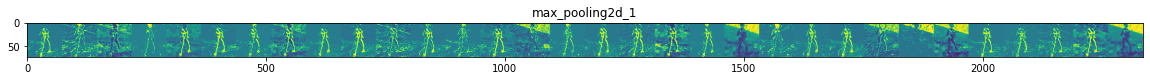

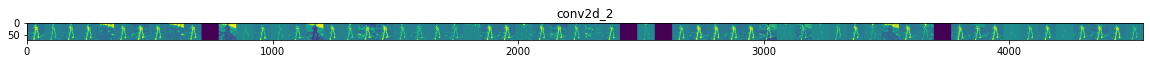

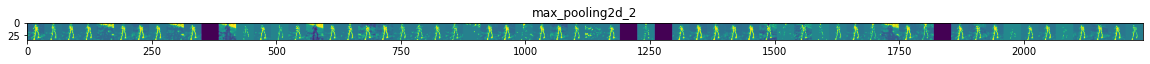

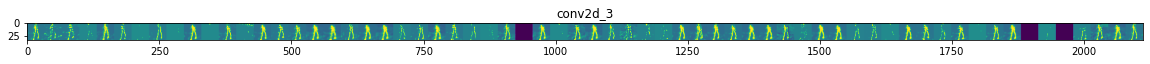

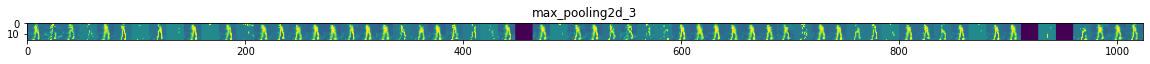

In [19]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')